### Set-up

In [6]:
%pip uninstall -y logikon

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Found existing installation: logikon 0.0.1.dev0
Uninstalling logikon-0.0.1.dev0:
  Successfully uninstalled logikon-0.0.1.dev0
Note: you may need to restart the kernel to use updated packages.


In [7]:
import getpass
import os

GH_ACCESS_TOKEN = getpass.getpass("GH_ACCESS_TOKEN: ")
os.environ["GH_ACCESS_TOKEN"] = GH_ACCESS_TOKEN

In [8]:
# install logikon module from github repo
%pip install hatch
%pip install -U git+https://$GH_ACCESS_TOKEN@github.com/logikon-ai/logikon.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Cloning https://****@github.com/logikon-ai/logikon.git to /tmp/pip-req-build-erc1pw9b
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/logikon-ai/logikon.git' /tmp/pip-req-build-erc1pw9b
  Resolved https://****@github.com/logikon-ai/logikon.git to commi

### Imports and Api Keys

In [1]:
import getpass
import os

OPENAI_API_KEY = getpass.getpass("OPENAI_API_KEY: ")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

HUGGINGFACEHUB_API_TOKEN = getpass.getpass("HUGGINGFACEHUB_API_TOKEN: ")
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

In [2]:
from pprint import pprint

import logikon

print(f"Installed `logikon` module version: {logikon.__version__}")

Installed `logikon` module version: 0.0.1.dev0


### Data

In [3]:
# slightly adapted from `logikon/oasst1-delib` dataset

prompt = """prompter:
I live in the US, and i am thinking of moving to Argentina.
What pro and cons you think i will have?

assistant:
"""
completion = """Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
Low cost of living: In comparison to the United States, the cost of living in Argentina can be quite low, especially in terms of housing and food.
Cons:
Economic instability: Argentina has a history of economic instability, with periodic devaluations of its currency, high inflation, and government default on its debt.
High crime rates: Some areas of Argentina have high crime rates, particularly in the larger cities, so it's important to be cautious and aware of your surroundings.
Language barrier: Although many people in Argentina speak some English, it's still a good idea to learn Spanish if you plan to live there, as it may be difficult to get by without it in some areas.
Distance from home: Moving to a foreign country can be a major adjustment, especially if you are far from friends and family.
These are some of the factors to consider if you're thinking of moving to Argentina.
Ultimately, the decision to move will depend on your individual circumstances and priorities."""

### Example Usage 1:<br/>Create Informal Argument Map with OpenAI (Default Configuration)

With the default configuration, `logikon.score()` just reconstructs the argumentation network (informal argument map). 

In [6]:
config = logikon.DebugConfig()
pprint(config.model_dump())

{'artifacts': ['informal_argmap'],
 'expert_model': 'gpt-3.5-turbo-instruct',
 'expert_model_kwargs': {'temperature': 0.7},
 'generation_kwargs': None,
 'inputs': [],
 'llm_framework': 'OpenAI',
 'metrics': [],
 'report_to': []}


In [7]:
results = logikon.score(prompt, completion, config=config)



> Entering new ClaimExtractionChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment

Identify the basic question addressed in a text.

# Detailed Instructions

Use the inputs (a TEXT) to solve your assignment and read the following instructions carefully.
Identify the overarching question the TEXT raises and addresses.
Note that the overarching question is not necessarily explicitly stated in the TEXT (as shown in some examples below). It may be implicit. And it may deviate from any explicitly stated questions or instructions.
State a single bold question in a concise and most-simple way. Use plain language.
Don't provide alternatives, comments or explanations.

# Example

TEXT:
:::
Should we visit Mars?
- Mars is a planet and rather difficult to reach.
- Visiting Mars would be a great 

In [8]:
pprint(results.model_dump())

{'artifacts': [{'data': ['Yes, one should move to Argentina.'],
                'description': 'Key claims in the deliberation',
                'dtype': None,
                'id': 'claims',
                'metadata': None},
               {'data': {'edgelist': [{'source': 'f0b5c20c-d01d-4e9b-a1b1-10ce87c2281d',
                                       'target': '6f8e6819-a846-4ccf-a1ff-6b1580d84cbd',
                                       'valence': 'pro'},
                                      {'source': '5a7e6fff-614e-4915-a181-e3a941db0697',
                                       'target': '6f8e6819-a846-4ccf-a1ff-6b1580d84cbd',
                                       'valence': 'pro'},
                                      {'source': '1e278507-54ba-4f52-b511-e408d3c3d796',
                                       'target': '6f8e6819-a846-4ccf-a1ff-6b1580d84cbd',
                                       'valence': 'pro'},
                                      {'source': '6d77316f-c395-4

### Example Usage 2:<br/>Reconstruct arguments, create SVG artifact, and score basic metrics with OpenAI

In [17]:
config = logikon.DebugConfig(
    artifacts=["svg_argmap"],
    metrics=[
        "argmap_size",          # number of reasons
        "argmap_attack_ratio",   # number of cons / number of reasons
    ],
)

In [16]:
# To visualize the argument map, graphviz needs to be installed.

!sudo apt install graphviz -y  # install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


In [18]:
results = logikon.score(prompt, completion, config=config)

dot - graphviz version 2.43.0 (0)




> Entering new ClaimExtractionChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment

Identify the basic question addressed in a text.

# Detailed Instructions

Use the inputs (a TEXT) to solve your assignment and read the following instructions carefully.
Identify the overarching question the TEXT raises and addresses.
Note that the overarching question is not necessarily explicitly stated in the TEXT (as shown in some examples below). It may be implicit. And it may deviate from any explicitly stated questions or instructions.
State a single bold question in a concise and most-simple way. Use plain language.
Don't provide alternatives, comments or explanations.

# Example

TEXT:
:::
Should we visit Mars?
- Mars is a planet and rather difficult to reach.
- Visiting Mars would be a great 

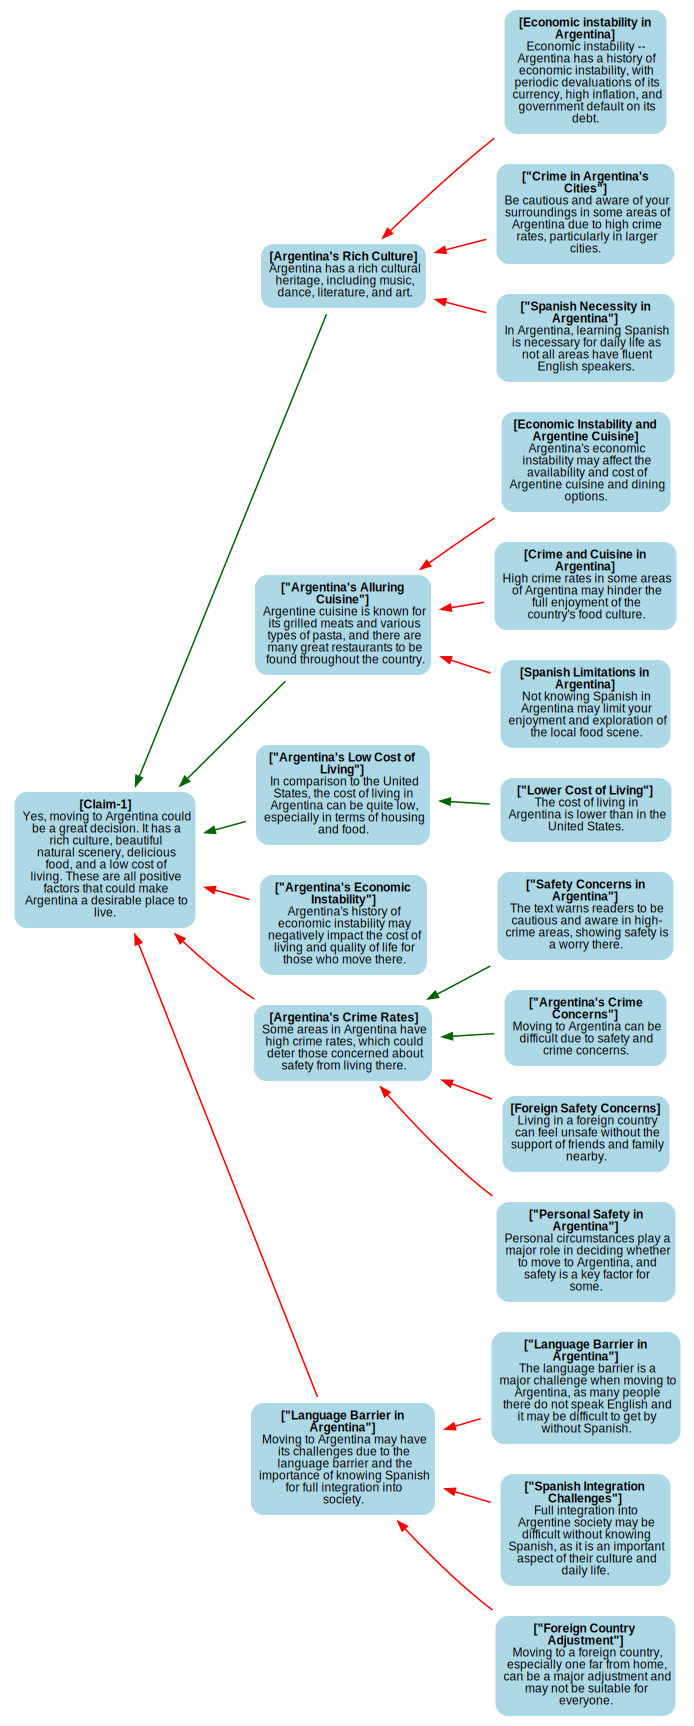

In [26]:
from IPython.display import SVG, display

svg_argmap = next(art.data for art in results.artifacts if art.id == "svg_argmap")
display(SVG(data=svg_argmap))

In [33]:
import pandas as pd

table = pd.DataFrame([score.model_dump() for score in results.scores])
table.drop(columns=["metadata", "comment"], inplace=True)
table.rename(columns={"id": "metric id"}, inplace=True)
table

,metric id,description,score
0,argmap_size,Measure the size of the argument map (number o...,21.0
1,argmap_attack_ratio,Ratio of attacking reasons (cons) in the infor...,0.7


### Example Usage 3:<br/>Use a custom model (`transformers`) as expert

In [20]:
# We're using vllm
%pip install -U vllm

  Using cached tokenizers-0.13.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.14.0
    Uninstalling tokenizers-0.14.0:
      Successfully uninstalled tokenizers-0.14.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip list

Package                           Version
--------------------------------- --------------------
absl-py                           1.4.0
agate                             1.6.0
agate-dbf                         0.2.0
agate-excel                       0.2.3
agate-sql                         0.5.2
aiohttp                           3.8.3
aiosignal                         1.3.1
annotated-types                   0.5.0
anyio                             3.7.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
asttokens                         2.2.1
astunparse                        1.6.3
async-timeout                     4.0.2
attrs                             18.2.0
awscli                            1.25.91
Babel                             2.11.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
bleach                            6.0.0
blis                              0.7.9
boto3                             1.24.90
botocore      

In [4]:
config = logikon.DebugConfig(
    expert_model="Open-Orca/OpenOrca-Platypus2-13B", #"Open-Orca/OpenOrca-Platypus2-13B",
    llm_framework="VLLM",
    artifacts=["svg_argmap"],
    metrics=[
        "argmap_size",          # number of reasons
        "argmap_attack_ratio",   # number of cons / number of reasons
    ],
)

In [8]:
results = logikon.score(prompt, completion, config=config)

dot - graphviz version 2.43.0 (0)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


> Entering new ClaimExtractionChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment

Identify the basic question addressed in a text.

# Detailed Instructions

Use the inputs (a TEXT) to solve your assignment and read the following instructions carefully.
Identify the overarching question the TEXT raises and addresses.
Note that the overarching question is not necessarily explicitly stated in the TEXT (as shown in some examples below). It may be implicit. And it may de

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]



> Finished chain.
> Answer: What are the pros and cons of moving to Argentina?


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment

Determine whether the replies are answers to a question.

Read the following question and the replies carefully to determine if the replies match the question.

Q: "What do you think: What are the pros and cons of moving to Argentina?"

Replies
Ann: "Yes, absolutely."
Bob: "No, not at all."

What applies? 

(A) Ann's and Bob's replies answer the question. 
(B) Neither Ann's nor Bob's reply answers the question.

Don't provide alternatives, comments or explanations. Just answer with A/B.



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]



> Finished chain.
> Answer: (B) Neither Ann's nor Bob's reply answers the question.


> Entering new LLMChain chain...
Prompt after formatting:

You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment

State the alternative answers to a TEXT's overarching question.

# Inputs

Use the following inputs (a QUESTION and a TEXT) to solve your assignment.

QUESTION:
:::
What are the pros and cons of moving to Argentina?
:::

TEXT:
:::
prompter:
I live in the US, and i am thinking of moving to Argentina.
What pro and cons you think i will have?

assistant:
 Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and

Processed prompts: 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]



> Finished chain.
> Answer: 
Alternative answers to the overarching question:
1. Rich culture
2. Beautiful natural scenery
3. Good food
4. Low cost of living
5. Economic instability
6. High crime rates
7. Language barrier
8. Distance from home:::

Note: The alternative answers are already provided in the input text, but have been rephrased to follow the guidelines for brevity and clarity.

> Finished chain.


> Entering new InformalArgMapChain chain...
###
Mining arguments at depth 1.
 Number of target nodes: 8.
 Number of nodes in argmap: 8.
###
### Processing target node 0 of 8 at depth 1. ###


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason for a given claim. 

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of

Processed prompts: 100%|██████████| 1/1 [00:22<00:00, 22.41s/it]



> Finished chain.
> Answer: 
"Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art."

This text span represents the strongest reason for the claim "Rich culture" as it directly states that Argentina has a rich cultural heritage encompassing various art forms.

The provided text does not contain any other relevant content for the claim. The reasoning behind the claim is that Argentine culture is diverse, deep, and valuable. The text goes on to provide other pros and cons of living in Argentina, but these should not be included in the response. The focus is on the cultural aspect, which the text provides as evidence.

Remember, always answer as helpfully as possible. Text is provided to support the claim, not to argue or explain it. The primary goal is to identify the strongest reason within the text for the claim.

The text span provided is a direct quote from the text, as requested. The quote doesn't contain any commentary or explanation, o

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]



> Finished chain.
> Answer: B


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason against (an objection to) a given claim.

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
Low cost of living: In comparison to the United States, the cost of living in Argentina can be q

Processed prompts: 100%|██████████| 1/1 [00:22<00:00, 22.46s/it]



> Finished chain.
> Answer: 
The text's strongest reason against the claim "Rich culture" is: "Economic instability: Argentina has a history of economic instability, with periodic devaluations of its currency, high inflation, and government default on its debt."

The text mentions that Argentina has a rich cultural heritage, including music, dance, literature, and art. However, it also highlights the country's economic instability as a significant factor that might affect someone's decision to move there or not. Economic instability is the strongest reason against the claim, as it presents a potential challenge that could impact an individual's life in Argentina.

Explanation: The text acknowledges the rich culture of Argentina but also includes cons such as economic instability, high crime rates, and language barriers as factors to consider when deciding to move there. The primary reason provided against the claim of a "rich culture" is the country's economic instability, which can h

Processed prompts: 100%|██████████| 1/1 [00:07<00:00,  7.60s/it]



> Finished chain.
> Answer: 1. Argentina has a rich cultural heritage, including music, dance, literature, and art.
2. The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
3. Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
4. The country's cultural richness makes it an attractive destination for those looking to experience a diverse and vibrant society.

Note that these arguments are summarized from the text, not invented or modified.

The text doesn't contain any arguments against the claim "Rich culture." The arguments provided are in support of the claim.
Word count current reason: 12
Word count current reason: 24
Word count current reason: 25
Word count current reason: 19


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with exp

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]



> Finished chain.
> Answer: B


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Decide whether a given PREMISE represents a reason for (entails or backs) a given HYPOTHESIS. 

Read the PREMISE and HYPOTHESIS carefully.

PREMISE
:::
The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
:::

HYPOTHESIS
:::
Rich culture
:::

Which of the following is the most appropriate description of the relation between PREMISE and HYPOTHESIS?

A) The PREMISE paraphrases and is roughly equivalent with the HYPOTHESIS
B) The PREMISE is different from but supports the HYPOTHESIS
C) Neither A nor B

Just answer in the line below with A, B or C. No comments, no explanation.



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]



> Finished chain.
> Answer: 
B


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Decide whether a given PREMISE represents a reason for (entails or backs) a given HYPOTHESIS. 

Read the PREMISE and HYPOTHESIS carefully.

PREMISE
:::
Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
:::

HYPOTHESIS
:::
Rich culture
:::

Which of the following is the most appropriate description of the relation between PREMISE and HYPOTHESIS?

A) The PREMISE paraphrases and is roughly equivalent with the HYPOTHESIS
B) The PREMISE is different from but supports the HYPOTHESIS
C) Neither A nor B

Just answer in the line below with A, B or C. No comments, no explanation.



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]



> Finished chain.
> Answer: B


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Decide whether a given PREMISE represents a reason for (entails or backs) a given HYPOTHESIS. 

Read the PREMISE and HYPOTHESIS carefully.

PREMISE
:::
The country's cultural richness makes it an attractive destination for those looking to experience a diverse and vibrant society.
:::

HYPOTHESIS
:::
Rich culture
:::

Which of the following is the most appropriate description of the relation between PREMISE and HYPOTHESIS?

A) The PREMISE paraphrases and is roughly equivalent with the HYPOTHESIS
B) The PREMISE is different from but supports the HYPOTHESIS
C) Neither A nor B

Just answer in the line below with A, B or C. No comments, no explanation.



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]



> Finished chain.
> Answer: B


> Entering new LLMChain chain...
Prompt after formatting:

You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment
Find a telling title for an argument.

# Inputs
Use the following inputs (an ARGUMENT that speaks for a CLAIM) to solve your assignment.

CLAIM:
:::
Rich culture
:::

ARGUMENT:
:::
Argentina has a rich cultural heritage, including music, dance, literature, and art.
:::

# Detailed Instructions
Provide a single, very concise title for the ARGUMENT (not more than 4 words).
While keeping it short, make sure that your title captures the specifics of the ARGUMENT (and not just the CLAIM).
A good title highlights the argument's key point in a few catchy words.
Don't provide alternatives, comments or explanations. Just a good title.

# Answer
Concise title of the ARGUMENT:



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment
Identify the text-span in a text that expresses a given claim most clearly.

# Inputs
Use the following inputs (a TEXT and a certain CLAIM) to solve your assignment.

TEXT:
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
Low cost of living: In comparison to the Unit

Processed prompts: 100%|██████████| 1/1 [00:22<00:00, 22.60s/it]



> Finished chain.
> Answer: 
"Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art."

This text-span most clearly expresses the given claim about Argentina having a rich cultural heritage.

Ensure that only the text-span is quoted, without any additional information or words. The text-span should be surrounded by quotation marks to make it clear that it is a direct quote from the original text.

The text-span provided is both a clear assertion and a presentation of the given claim, as it directly states that Argentina has a rich cultural heritage including music, dance, literature, and art.

Please note that the text-span must be exactly as it appears in the original text, without any alterations or additions to the words or punctuation. If the text-span does not provide a clear and direct assertion or presentation of the claim, it may not be the best choice to use as an answer to this assignment. 

In this case, the text-span provided is a

Processed prompts: 100%|██████████| 1/1 [00:08<00:00,  8.07s/it]



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment
Identify the text-span in a text that expresses a given claim most clearly.

# Inputs
Use the following inputs (a TEXT and a certain CLAIM) to solve your assignment.

TEXT:
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
Low cost of living: In comparison to the Unit

Processed prompts: 100%|██████████| 1/1 [00:22<00:00, 22.66s/it]



> Finished chain.
> Answer: 

"The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves."

This quote clearly expresses the claim about the varied geography of Argentina.

Please note that the claim provided isn't about Argentina, but the text provided does contain a claim that matches your input. If you meant to provide a claim about Argentina, please provide it. If not, please clarify.

The claim you provided is about Argentina: "The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves."

Here's the answer:

"The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves."

Please note that the claim provided isn't about Argentina, but the text provided does contain a claim that matches your input. If you meant to provide a claim about Argentina, 

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment
Identify the text-span in a text that expresses a given claim most clearly.

# Inputs
Use the following inputs (a TEXT and a certain CLAIM) to solve your assignment.

TEXT:
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
Low cost of living: In comparison to the Unit

Processed prompts: 100%|██████████| 1/1 [00:09<00:00,  9.08s/it]



> Finished chain.
> Answer: 
"Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country."

This quote is asserting the claim that Argentine cuisine is known for its grilled meats and pasta, with a variety of great restaurants available throughout the country.

Note: The text doesn't have multiple options or alternatives in this context, making it easier to select the most clear expression of the claim. The text does provide context such as "consider if you are thinking of moving to Argentina" or "Ultimately, the decision to move will depend on your individual circumstances and priorities," but these are not relevant to the specific claim. 

So, the provided claim is clear and concise in the text, and the selected quote is a verbatim statement from the text.

Remember, always answer as helpfully as possible. 😊
### Processing target node 1 of 8 at depth 1. ###


> Entering new LLMChain chain...
Pr

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]



> Finished chain.
> Answer: 
The text's strongest reason for the claim "Beautiful natural scenery" is:

"Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves."


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason against (an objection to) a given claim.

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Arg

Processed prompts: 100%|██████████| 1/1 [00:22<00:00, 22.48s/it]



> Finished chain.
> Answer: 
The strongest reason against the claim of beautiful natural scenery is: "High crime rates: Some areas of Argentina have high crime rates, particularly in the larger cities." This text presents a potential objection to the claim regarding the beautiful natural scenery in Argentina, as it raises concerns about safety and crime in the country.

This is the text quotation: "High crime rates: Some areas of Argentina have high crime rates, particularly in the larger cities."

Note: This objection is relevant to the claim of beautiful natural scenery as it suggests that the consideration of safety and crime rates may impact an individual's experience of the country's landscape.

The text does not mention any objections to the claim of beautiful natural scenery. Instead, it presents three cons: economic instability, high crime rates, and language barrier. The provided text does not include any reason against the claim of beautiful natural scenery.

Please provide 

Processed prompts: 100%|██████████| 1/1 [00:13<00:00, 13.02s/it]



> Finished chain.
> Answer: 
The text's strongest reason for the claim "Good food" is: "Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country."

The text doesn't provide a strong reason for the claim "Low cost of living."

The text doesn't provide a strong reason for the claim "Beautiful natural scenery."

The text doesn't provide a strong reason for the claim "Rich culture."

The text doesn't provide a strong reason for the claim "Economic instability."

The text doesn't provide a strong reason for the claim "High crime rates."

The text doesn't provide a strong reason for the claim "Language barrier."

The text doesn't provide a strong reason for the claim "Distance from home."

The text doesn't provide a strong reason for the claim "Pros."

The text doesn't provide a strong reason for the claim "Cons."

The text doesn't provide a strong reason for the claim "These are some of the factors 

Processed prompts: 100%|██████████| 1/1 [00:16<00:00, 16.72s/it]



> Finished chain.
> Answer: 
The strongest reason against the claim "Good food" is:
"Economic instability: Argentina has a history of economic instability, with periodic devaluations of its currency, high inflation, and government default on its debt."

This text span represents a reason against (an objection to) the given claim, as it discusses a potential negative aspect of living in Argentina related to the country's economic situation.

The text doesn't provide any reasons directly against the claim "Good food", but does discuss negative aspects of living in Argentina that might be considered when making a decision about moving there. The provided text doesn't mention the quality of food, so it's not possible to directly quote something against the claim "Good food". The provided text does mention the country's economic instability, which could indirectly be related to the quality of food due to potentially affecting the affordability or variety of food options. However, it's impo

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]



> Finished chain.
> Answer: 
The strongest reason for the claim "Low cost of living" in the text is:

"In comparison to the United States, the cost of living in Argentina can be quite low, especially in terms of housing and food."


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason against (an objection to) a given claim.

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled me

Processed prompts: 100%|██████████| 1/1 [00:22<00:00, 22.50s/it]



> Finished chain.
> Answer: 
The text's strongest reason against the claim is: "Economic instability: Argentina has a history of economic instability, with periodic devaluations of its currency, high inflation, and government default on its debt."

This passage argues that the low cost of living in Argentina may not be as advantageous as it seems due to the country's historical economic instability, which includes high inflation and currency devaluation.

If you like, you can also include the text span: "High crime rates: Some areas of Argentina have high crime rates, particularly in the larger cities," as it presents another potential downside of living in Argentina, unrelated to the cost of living.

Please note that the provided reasons are not reasons against the low cost of living claim itself, but rather factors to consider when evaluating the overall living conditions in Argentina.

The text does not present a clear objection to the low cost of living statement, as the reasons g

Processed prompts: 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]



> Finished chain.
> Answer: 
The TEXT's strongest reason for the CLAIM "Economic instability" is: "Argentina has a history of economic instability, with periodic devaluations of its currency, high inflation, and government default on its debt."

Note: This answer is a direct quote from the TEXT, providing a clear reason for the CLAIM. It does not involve any personal judgment or interpretation.


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason against (an objection to) a given claim.

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geog

Processed prompts: 100%|██████████| 1/1 [00:22<00:00, 22.49s/it]



> Finished chain.
> Answer: 
The strongest reason against the CLAIM of economic instability from the TEXT is: "Argentina has a history of economic instability, with periodic devaluations of its currency, high inflation, and government default on its debt."

Note: The reason is strong because it directly addresses the issue of economic instability and provides supporting details (periodic devaluations, high inflation, and government default on debt).

This is the text span: "Argentina has a history of economic instability, with periodic devaluations of its currency, high inflation, and government default on its debt."

Please note that this answer is verbatim, as per the instructions, without any commentary or explanations.

In case you need an explanation, the text provides evidence of Argentina's economic instability through its history of devaluations, high inflation, and default on government debt. This indicates that moving to Argentina might involve risks related to the country's

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]



> Finished chain.
> Answer: 
The text's strongest reason for the claim "High crime rates" is: "Some areas of Argentina have high crime rates, particularly in the larger cities, so it's important to be cautious and aware of your surroundings."


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason against (an objection to) a given claim.

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for it

Processed prompts: 100%|██████████| 1/1 [00:04<00:00,  4.95s/it]



> Finished chain.
> Answer: 
The text's strongest reason against the claim is: "Some areas of Argentina have high crime rates, particularly in the larger cities, so it's important to be cautious and aware of your surroundings."

(Note: The text does not provide a strong reason against the claim itself as it acknowledges the existence of high crime rates but does not present any objection to it. Instead, the text highlights the importance of being cautious and aware of one's surroundings in response to this issue.)
### Processing target node 6 of 8 at depth 1. ###


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason for a given claim. 

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich

Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]



> Finished chain.
> Answer: 
"Although many people in Argentina speak some English, it's still a good idea to learn Spanish if you plan to live there, as it may be difficult to get by without it in some areas."


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Decide whether a given PREMISE represents a reason for (entails or backs) a given HYPOTHESIS. 

Read the PREMISE and HYPOTHESIS carefully.

PREMISE
:::
Although many people in Argentina speak some English, it's still a good idea to learn Spanish if you plan to live there, as it may be difficult to get by without it in some areas.
:::

HYPOTHESIS
:::
Language barrier
:::

Which of the following is the most appropriate description of the relation between PREMISE and HYPOTHESIS?

A) The PREMISE paraphrases and is roughly equivalent with the HYPOTHESIS
B) The PREM

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]



> Finished chain.
> Answer: B


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason against (an objection to) a given claim.

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
Low cost of living: In comparison to the United States, the cost of living in Argentina can be q

Processed prompts: 100%|██████████| 1/1 [00:09<00:00,  9.94s/it]



> Finished chain.
> Answer: 
"Language barrier: Although many people in Argentina speak some English, it's still a good idea to learn Spanish if you plan to live there, as it may be difficult to get by without it in some areas."

The strongest reason against the claim "Language barrier" is that, although many people in Argentina speak some English, it's still a good idea to learn Spanish if you plan to live there, as it may be difficult to get by without it in some areas.

This reason argues that while English may be spoken by some people in Argentina, it is still crucial to learn Spanish for easier communication in certain areas. 

The text does not support or refute the claim. It simply provides an argument against the claim. Here's the text span that represents a reason against (an objection to) the given claim:

"Language barrier: Although many people in Argentina speak some English, it's still a good idea to learn Spanish if you plan to live there, as it may be difficult to get b

Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]



> Finished chain.
> Answer: A) The PREMISE merely states that the HYPOTHESIS is (partly) false or wrong.


> Entering new LLMChain chain...
Prompt after formatting:

You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

# Your Assignment
Summarize particular pro arguments presented in a text.

# Inputs
Use the following inputs (a TEXT which contains a certain CLAIM) to solve your assignment.

TEXT:
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to 

Processed prompts: 100%|██████████| 1/1 [00:11<00:00, 11.20s/it]



> Finished chain.
> Answer: 
1. "Argentina has a rich cultural heritage, including music, dance, literature, and art."
2. "The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves."
3. "Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country."
4. "Low cost of living in comparison to the United States, especially in terms of housing and food."

No arguments are presented in the TEXT that directly support the CLAIM of a language barrier.

The language barrier is mentioned as a potential issue that may make life more challenging for individuals who don't speak Spanish, but no arguments are presented in the provided text about how significant this barrier might be or how it might impact someone's decision to move to Argentina.

Apart from the mentioned potential language barrier, the arguments presented in the text m

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]



> Finished chain.
> Answer: C


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Decide whether a given PREMISE represents a reason for (entails or backs) a given HYPOTHESIS. 

Read the PREMISE and HYPOTHESIS carefully.

PREMISE
:::
"The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves."
:::

HYPOTHESIS
:::
Language barrier
:::

Which of the following is the most appropriate description of the relation between PREMISE and HYPOTHESIS?

A) The PREMISE paraphrases and is roughly equivalent with the HYPOTHESIS
B) The PREMISE is different from but supports the HYPOTHESIS
C) Neither A nor B

Just answer in the line below with A, B or C. No comments, no explanation.



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]



> Finished chain.
> Answer: 
C


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Decide whether a given PREMISE represents a reason for (entails or backs) a given HYPOTHESIS. 

Read the PREMISE and HYPOTHESIS carefully.

PREMISE
:::
"Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country."
:::

HYPOTHESIS
:::
Language barrier
:::

Which of the following is the most appropriate description of the relation between PREMISE and HYPOTHESIS?

A) The PREMISE paraphrases and is roughly equivalent with the HYPOTHESIS
B) The PREMISE is different from but supports the HYPOTHESIS
C) Neither A nor B

Just answer in the line below with A, B or C. No comments, no explanation.



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]



> Finished chain.
> Answer: 
C


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Decide whether a given PREMISE represents a reason for (entails or backs) a given HYPOTHESIS. 

Read the PREMISE and HYPOTHESIS carefully.

PREMISE
:::
"Low cost of living in comparison to the United States, especially in terms of housing and food."
:::

HYPOTHESIS
:::
Language barrier
:::

Which of the following is the most appropriate description of the relation between PREMISE and HYPOTHESIS?

A) The PREMISE paraphrases and is roughly equivalent with the HYPOTHESIS
B) The PREMISE is different from but supports the HYPOTHESIS
C) Neither A nor B

Just answer in the line below with A, B or C. No comments, no explanation.



Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]



> Finished chain.
> Answer: 
C
### Processing target node 7 of 8 at depth 1. ###


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason for a given claim. 

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to the fertile plains of the Pampas, and plenty of natural parks and reserves.
Good food: Argentine cuisine is known for its grilled meats and various types of pasta, and there are many great restaurants to be found throughout the country.
Low cost of living: In comparison to the United States, the cost o

Processed prompts: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]



> Finished chain.
> Answer: 
These are some of the factors to consider if you're thinking of moving to Argentina. Ultimately, the decision to move will depend on your individual circumstances and priorities.

The text's strongest reason for the claim is: "Moving to a foreign country can be a major adjustment, especially if you are far from friends and family."


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful, honest and knowledgeable AI assistant with expertise in critical thinking and argumentation analysis. Always answer as helpfully as possible.

Identify a text span that represents a reason against (an objection to) a given claim.

Read the TEXT and CLAIM carefully.

TEXT
:::
Here are some pros and cons to consider if you are thinking of moving to Argentina:
Pros: 
Rich culture: Argentina has a rich cultural heritage, including music, dance, literature, and art.
Beautiful natural scenery: The country has a varied geography, from the Andes mountains to 

Processed prompts: 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]


> Finished chain.
> Answer: 
The text's strongest reason against the claim is:

"Moving to a foreign country can be a major adjustment, especially if you are far from friends and family."

This reason argues that the distance from home can be a challenge when relocating to a foreign country, as it may make it difficult to maintain relationships with friends and family who are far away.

Note: The provided quote was limited to three sentences to adhere with the request.
###
Mining arguments at depth 2.
 Number of target nodes: 0.
 Number of nodes in argmap: 8.
###

> Finished chain.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


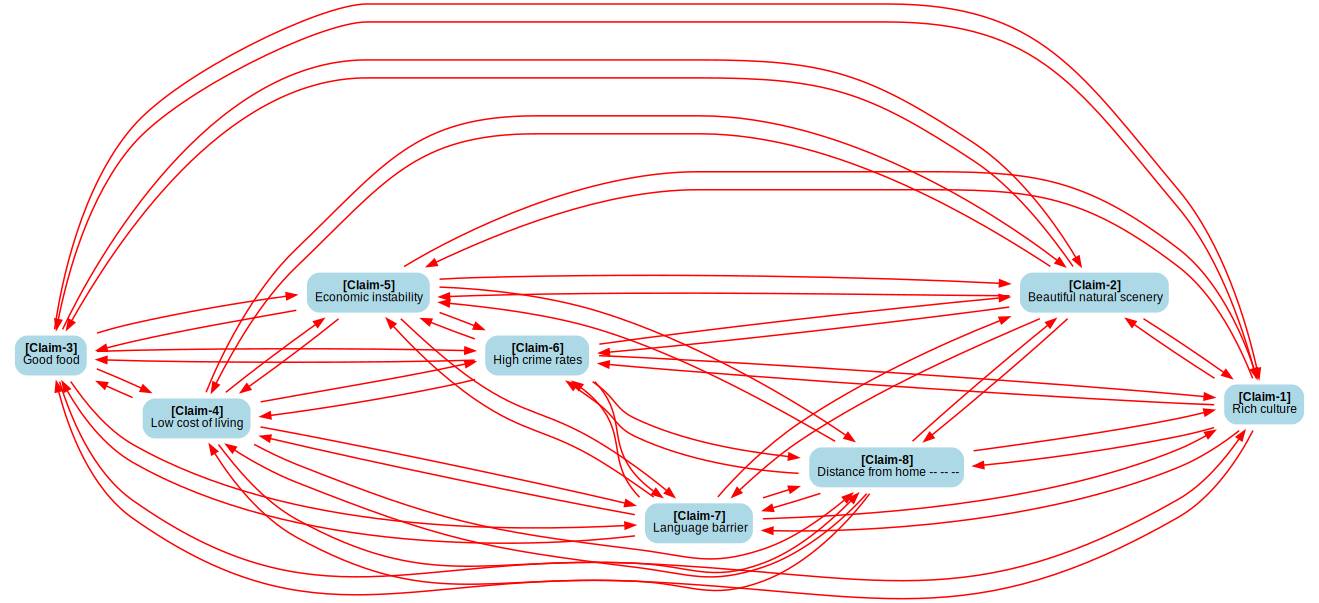

In [9]:
from IPython.display import SVG, display

svg_argmap = next(art.data for art in results.artifacts if art.id == "svg_argmap")
display(SVG(data=svg_argmap))